In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
import pandas_datareader

In [7]:
from datetime import datetime

In [8]:
from __future__ import division

In [9]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [10]:
end = datetime.now()

start = datetime(end.year - 1,end.month,end.day)

In [14]:
for stock in tech_list:   
    globals()[stock] = pandas_datareader.get_data_yahoo(stock,start,end) #globals() makes it a global variable

In [15]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-07,126.320000,124.830002,126.169998,125.900002,71057600.0,125.184792
2021-06-08,128.460007,126.209999,126.599998,126.739998,74403800.0,126.020020
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,126.407799
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,125.393600
2021-06-11,127.440002,126.099998,126.529999,127.349998,53522400.0,126.626549
...,...,...,...,...,...,...
2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.839996
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.710007
2022-06-02,151.270004,146.860001,147.830002,151.210007,72348100.0,151.210007


In [16]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-07,2468.000000,2441.072998,2451.320068,2466.090088,1192500,2466.090088
2021-06-08,2494.495117,2468.239990,2479.899902,2482.850098,1253000,2482.850098
2021-06-09,2505.000000,2487.330078,2499.500000,2491.399902,1006300,2491.399902
2021-06-10,2523.260010,2494.000000,2494.010010,2521.600098,1561700,2521.600098
2021-06-11,2526.989990,2498.290039,2524.919922,2513.929932,1262000,2513.929932


In [17]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,157.292688,153.724545,155.421384,155.604743,8.900827e+07,155.140590
std,13.784990,13.212916,13.568037,13.454496,2.669118e+07,13.553711
min,126.320000,124.830002,126.169998,125.900002,4.100000e+07,125.184792
25%,147.460007,144.899994,145.940002,146.089996,7.044060e+07,145.477722
50%,154.630005,150.380005,151.889999,152.059998,8.558920e+07,151.870819
75%,169.679993,165.500000,167.479996,166.559998,1.037184e+08,166.315643
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-06-07 to 2022-06-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


In [ ]:
#What was the change in price of the stock over time?

<AxesSubplot:xlabel='Date'>

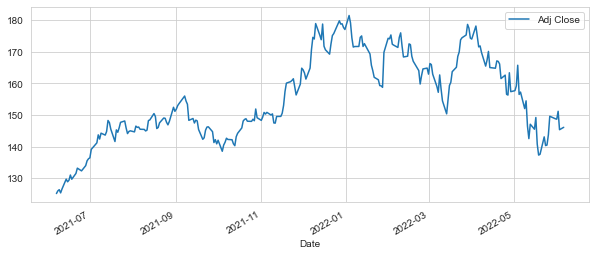

In [19]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

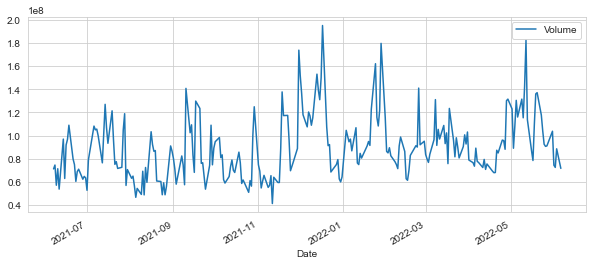

In [20]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [21]:
#What was the moving average of the various stocks?

In [23]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name='MA for %s days'%(str(ma))
    AAPL[column_name]=DataFrame.rolling(AAPL['Adj Close'],ma).mean()

<AxesSubplot:xlabel='Date'>

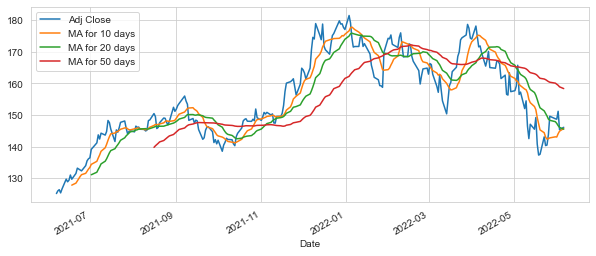

In [25]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [27]:
#What was the daily return of the stock on average?

<AxesSubplot:xlabel='Date'>

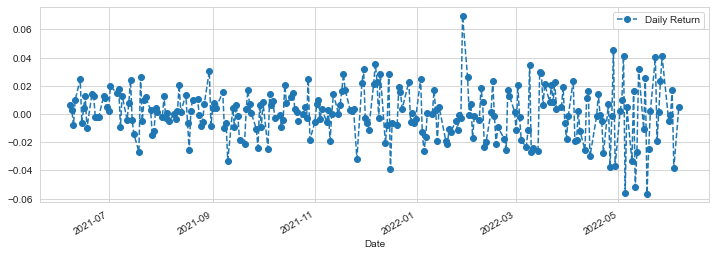

In [28]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change() #percentage change

AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

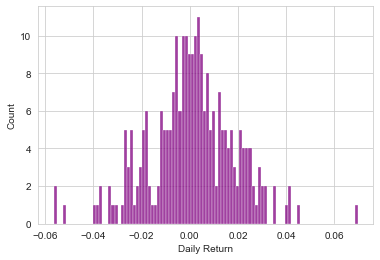

In [36]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

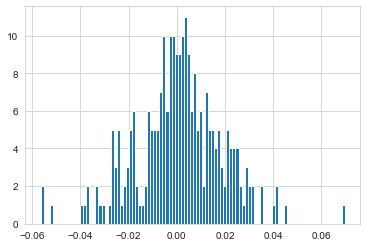

In [37]:
AAPL['Daily Return'].hist(bins=100) #Alternative

In [38]:
#What was the correlation between different stocks' closing prices?

In [42]:
closing_df = pandas_datareader.get_data_yahoo(tech_list,start,end)['Adj Close']

In [45]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-07,125.184792,2466.090088,251.754288,159.900497
2021-06-08,126.020020,2482.850098,250.524338,163.205505
2021-06-09,126.407799,2491.399902,251.536057,164.057495
2021-06-10,125.393600,2521.600098,255.156509,167.482498
2021-06-11,126.626549,2513.929932,255.801270,167.341507


In [ ]:
#What was the correlation between different stocks' daily returns?

In [46]:
tech_rets = closing_df.pct_change()

In [48]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-07,NaN,NaN,NaN,NaN
2021-06-08,0.006672,0.006796,-0.004886,0.020669
2021-06-09,0.003077,0.003444,0.004038,0.005220
2021-06-10,-0.008023,0.012122,0.014393,0.020877
2021-06-11,0.009833,-0.003042,0.002527,-0.000842


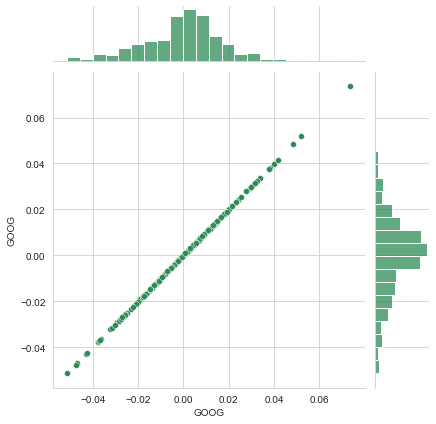

In [52]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

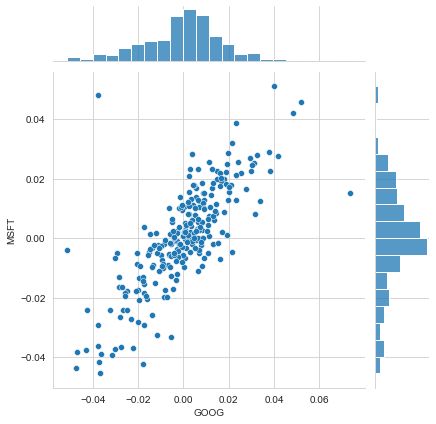

In [146]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

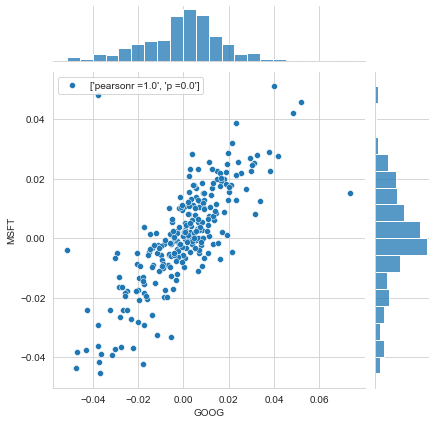

In [260]:
import scipy.stats as stats
from scipy import stats

pearson = stats.pearsonr(np.logical_not(np.isnan(tech_rets['GOOG'])),np.logical_not(np.isnan(tech_rets['MSFT'])))

g = sns.JointGrid(x='GOOG',y='MSFT',data=tech_rets)

g.plot(sns.scatterplot, sns.histplot,label=['pearsonr =' + str(pearson[0]),'p =' + str(pearson[1])])

#g.plot(sns.scatterplot, sns.histplot)
#plt.legend(title='pearson', loc='best', labels=((pearson)[0]))

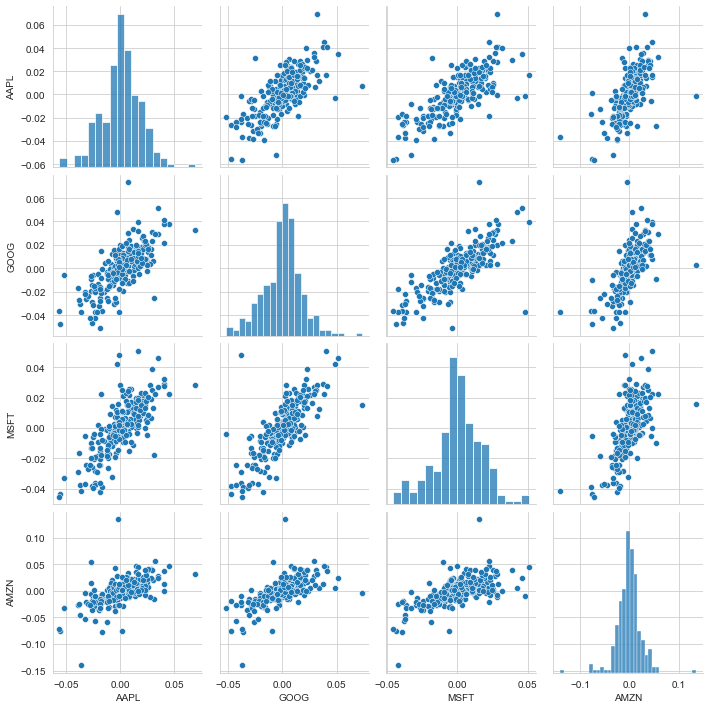

In [211]:
sns.pairplot(tech_rets.dropna())

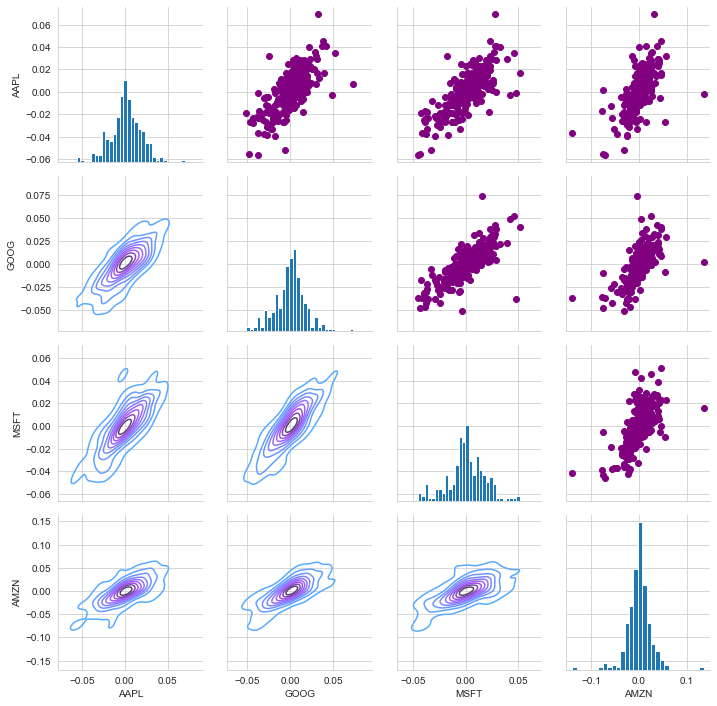

In [212]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30) 

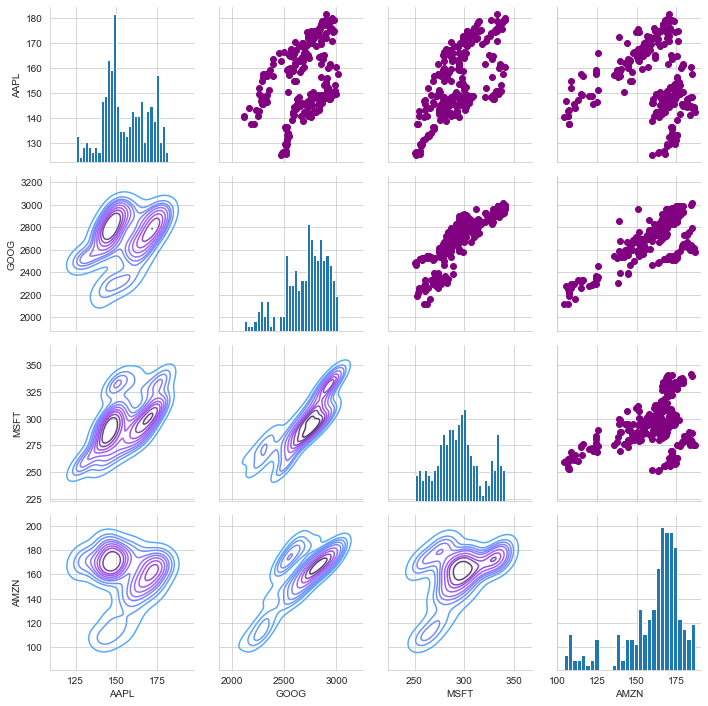

In [213]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

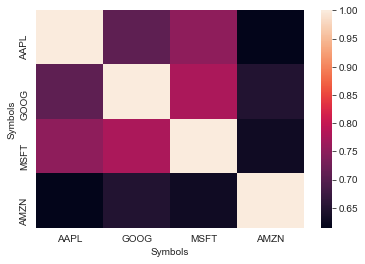

In [215]:
sns.heatmap(tech_rets.dropna().corr())

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

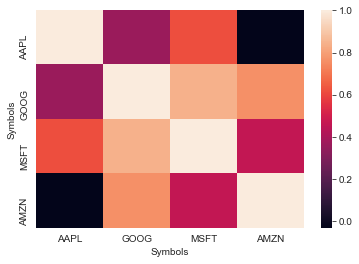

In [216]:
sns.heatmap(closing_df.dropna().corr())

In [217]:
#How much value do we put at risk by investing in a particular stock?

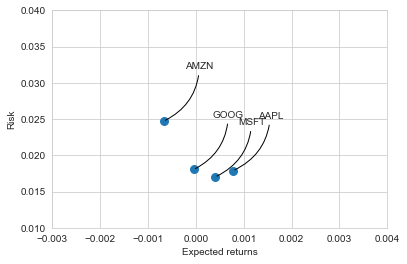

In [238]:
rets = tech_rets.dropna()

area = np.pi*20 #for the circles

plt.scatter(rets.mean(), rets.std(),s=area)

plt.ylim([0.01,0.04])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

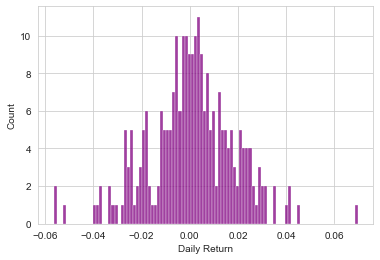

In [240]:
sns.histplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [241]:
rets['AAPL'].quantile(0.05)

-0.027036715979583494

In [242]:
days = 365

dt = 1/days #delta

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [248]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [244]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-07,2468.000000,2441.072998,2451.320068,2466.090088,1192500,2466.090088
2021-06-08,2494.495117,2468.239990,2479.899902,2482.850098,1253000,2482.850098
2021-06-09,2505.000000,2487.330078,2499.500000,2491.399902,1006300,2491.399902
2021-06-10,2523.260010,2494.000000,2494.010010,2521.600098,1561700,2521.600098
2021-06-11,2526.989990,2498.290039,2524.919922,2513.929932,1262000,2513.929932


In [245]:
start_price = 2451.32

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

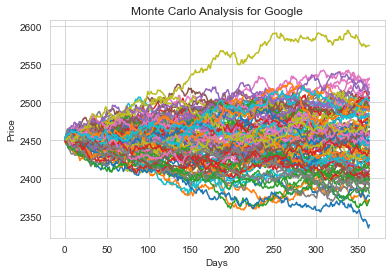

In [249]:
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [251]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

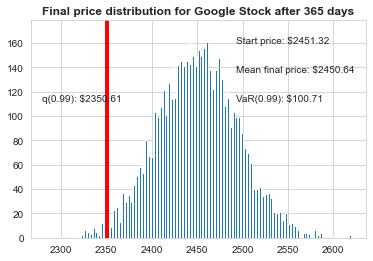

In [261]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');